In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import gensim

In [ ]:
#download the dataset
!mkdir /content/files
os.chdir('/content/files')
!gdown --id 17iBqP-Qz4Li4I_1QgPY0GPlVqXR7GFjZ
!gdown --id 1585HrklkC1rQUMIPA_OWQHSkcMkNRNYo
!unzip US_youtube_trending_data.csv.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17iBqP-Qz4Li4I_1QgPY0GPlVqXR7GFjZ
From (redirected): https://drive.google.com/uc?id=17iBqP-Qz4Li4I_1QgPY0GPlVqXR7GFjZ&confirm=t&uuid=0e993a97-41c9-403d-88ae-49ab1f7663c6
To: /content/files/US_youtube_trending_data.csv.zip
100% 164M/164M [00:09<00:00, 16.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1585HrklkC1rQUMIPA_OWQHSkcMkNRNYo
To: /content/files/US_category_id.json
100% 10.4k/10.4k [00:00<00:00, 33.3MB/s]
Archive:  US_youtube_trending_data.csv.zip
  inflating: US_youtube_t

In [ ]:
# seeing what data looks like, skipping over
# large chunks of it, to see it in a more representitive way

chunk_size = 100000
chunked_dataset = pd.read_csv('/content/files/US_youtube_trending_data.csv', chunksize=chunk_size)
for chunk in chunked_dataset:
    print(chunk.head())

      video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  b

In [ ]:
dataset = pd.read_csv('/content/files/US_youtube_trending_data.csv')
#look at data information
num_rows = dataset.shape[0]
print(num_rows)
print("Unique videos in set: ", len(dataset['video_id'].unique()))
print("Number of unique columns in data:", len(dataset.columns))
print(dataset.columns)

268787
Unique videos in set:  47142
Number of unique columns in data: 16
Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [ ]:
print("number of unique exact duplicates found in our data")
print(dataset.duplicated(keep=False).sum())

duplicates_all = dataset[dataset.duplicated(keep=False)]

title_counts = duplicates_all['title'].value_counts()
print("Video titles of exact duplicate videos and their frequencies:")
for title, count in title_counts.items():
    print(f"Count: {count}")

duplicates_all.head(2)

number of unique exact duplicates found in our data
166
Video titles of exact duplicate videos and their frequencies:
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2
Count: 2


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
3499,Th7Ega6WwJQ,GUESS WHICH BEER CHALLENGE FT. VLEX,2020-08-26T20:02:35Z,UCWr1HRHxzNwM0P9JJ1pmZSw,Danny Cashout,22,2020-08-29T00:00:00Z,[None],162958,16013,92,1098,https://i.ytimg.com/vi/Th7Ega6WwJQ/default.jpg,False,False,"Whats up guys! Its your boy Danny Cashhout, I ..."
3500,Th7Ega6WwJQ,GUESS WHICH BEER CHALLENGE FT. VLEX,2020-08-26T20:02:35Z,UCWr1HRHxzNwM0P9JJ1pmZSw,Danny Cashout,22,2020-08-29T00:00:00Z,[None],162958,16013,92,1098,https://i.ytimg.com/vi/Th7Ega6WwJQ/default.jpg,False,False,"Whats up guys! Its your boy Danny Cashhout, I ..."


In [ ]:
# dropping all exact duplicates from dataset
dataset.duplicated().sum()
dataset = dataset.drop_duplicates()
print(dataset.duplicated().sum())
print(dataset.shape)

0
(268704, 16)


In [ ]:
ratingDisabled = dataset['ratings_disabled'].value_counts()
commentDisabled = dataset['comments_disabled'].value_counts()
print(ratingDisabled)
print(commentDisabled)

ratings_disabled
False    267167
True       1537
Name: count, dtype: int64
comments_disabled
False    265197
True       3507
Name: count, dtype: int64


In [ ]:
data = None
# Open and read the JSON file
with open('US_category_id.json', 'r') as file:
    data = json.load(file)['items']
    data = {item['id']: item['snippet']['title'] for item in data}

print(data)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [ ]:
videos = {}

num_columns = dataset.select_dtypes(include=['float64', 'int64'])
if 'categoryId' in num_columns.columns:
  num_columns = num_columns.drop(columns = ["categoryId"], axis = 1)
for column in num_columns.columns:
  if('log' not in column):
    logColumnName = 'log_' + column
    dataset[logColumnName] = np.log(dataset[column] + 1)
#print(dataset['categoryId'])
print(dataset.columns)

#turns each numerical category into it's corresponding string value from
# print(dataset['categoryId'].dtype)
if dataset['categoryId'].dtype == 'int64':
  dataset['categoryId'] = dataset['categoryId'].astype(str).map(data)

# Use pd.get_dummies() to create a new DataFrame with the one-hot encoded values.
if 'categoryId_Autos & Vehicles' not in dataset.columns:
  # dataset = dataset.drop(columns = ['categoryId_Autos & Vehicles'], axis = 1)
  df_category = pd.get_dummies(dataset['categoryId'], prefix='categoryId')
  # Concatenate DataFrame df with the one-hot encoded columns
  dataset = dataset.join(df_category)
# Remove the original column
# dataset.drop(columns = 'categoryId', inplace=True)

dataset['tags'] = dataset['tags'].str.replace('|', ',')



# for ind in range(0,dataset.shape[0]):

#   video = dataset.iloc[ind]


#   if video['video_id'] not in videos:
#     videos[video['video_id']] = {
#               'title': video['title'],
#               'channelTitle': video['channelTitle'],
#               'category': video['categoryId'],
#               'tags': video['tags'],
#               'description': video['description'],
#               'publishedAt': video['publishedAt'],
#               'StatsByDate': {}  # Initialize StatsByDate here
#           }
#   videos[video['video_id']]['StatsByDate'][video["trending_date"]] = {
#         'likes': video['likes'],
#         'dislikes': video['dislikes'],
#         'views': video['view_count'],
#         'log_views': video['log_view_count'],
#         'log_likes': video['log_likes'],
#         'log_dislikes': video['log_dislikes'],
#         'log_comments': video['log_comment_count'],
#         'commentCount': video['comment_count']
#     }
dataset.sort_values(by = ["view_count"], inplace = True, ascending= True)
nonzeroViews = dataset['view_count'] > 0
print(nonzeroViews.value_counts())
dataset = dataset[nonzeroViews]
print(dataset.shape)
# zero_views = dataset['view_count'] ==
# print(zero_views)
dataset.head(2)




Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'log_view_count', 'log_likes',
       'log_dislikes', 'log_comment_count'],
      dtype='object')
view_count
True     268624
False        80
Name: count, dtype: int64
(268624, 35)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,categoryId_Gaming,categoryId_Howto & Style,categoryId_Music,categoryId_News & Politics,categoryId_Nonprofits & Activism,categoryId_People & Blogs,categoryId_Pets & Animals,categoryId_Science & Technology,categoryId_Sports,categoryId_Travel & Events
219276,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11T04:00:11Z,UCxbgnfIEf9Y7_g9QU9URRkg,DevonColeVEVO,Music,2023-08-11T00:00:00Z,"Devon Cole Lyrics,Lyrics,Devon Cole official,D...",2658,648,...,False,False,True,False,False,False,False,False,False,False
190453,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music ...,2023-03-17T20:00:09Z,UCulNMpwUyp_DPbec4J-Yt2g,Taleban Dooda,Music,2023-03-18T00:00:00Z,"taleban dooda,drill,tampa drill,drill music,co...",5835,762,...,False,False,True,False,False,False,False,False,False,False


[]
[]
[]


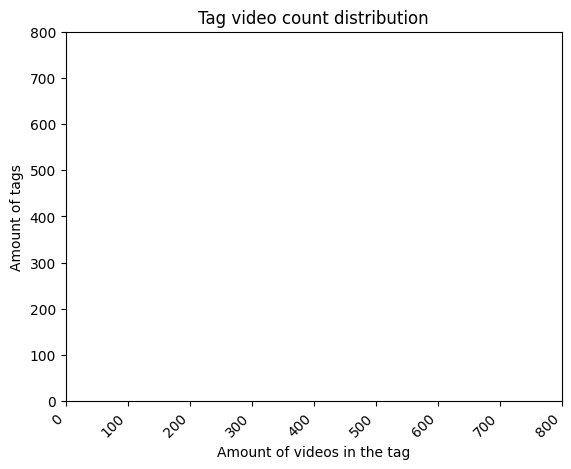

In [ ]:
#exploring which tags are most frequent.
tags = {}
top100tags = []
numTagsPerVideo = {}

#turns the string of tags into a dictionary of them and counts how many videos have a certain tag
for videoID in videos:
  video = videos[videoID]
  tag = video['tags']
  if tag:
    tag = tag.split(',')
    numTags = str(len(tag))
    if numTags in numTagsPerVideo:
      numTagsPerVideo[numTags] += 1
    else:
      numTagsPerVideo[numTags] = 1
    for t in tag:
      if t in tags:
        tags[t] += 1
      else:
        tags[t] = 1

#sorts tags by video count in descending order
sortedTags = sorted([(value,key) for (key,value) in tags.items()], reverse = True)
sortedNumTags = sorted([(int(key),value) for (key,value) in numTagsPerVideo.items()])
print(sortedTags[:10])

tag_counts = [tag[0] for tag in sortedTags]
print(tag_counts)
print(sortedNumTags)

#tag_names = [tag[1] for tag in sortedTags[::10000]]
plt.hist(tag_counts, bins = 1000)
plt.xlabel("Amount of videos in the tag")
plt.ylabel("Amount of tags")
plt.title("Tag video count distribution")
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 800])
plt.xlim([0, 800])
plt.show()

In [ ]:
#counts how much each video trended
videoTrendingCount = [i for i in dataset['video_id'].value_counts()]
print(len(videoTrendingCount))
print(videoTrendingCount)
trendingHistogram = {}
for video in videoTrendingCount:
   trendingCount = str(video)
   if trendingCount in trendingHistogram:
     trendingHistogram[trendingCount] += 1
   else:
     trendingHistogram[trendingCount] = 1

print(trendingHistogram)
# plt.hist(videoTrendingCount, 2)
# plt.xlabel("Amount of times video shows in trending")
# plt.ylabel("Amount of videos")
# plt.title("Tag video count distribution")
# plt.xticks(rotation=45, ha='right')
# plt.ylim([0, 50000])
# plt.xlim([0, 37])
# plt.show()

47124
[37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1

In [ ]:
dataset.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,categoryId_Gaming,categoryId_Howto & Style,categoryId_Music,categoryId_News & Politics,categoryId_Nonprofits & Activism,categoryId_People & Blogs,categoryId_Pets & Animals,categoryId_Science & Technology,categoryId_Sports,categoryId_Travel & Events
219276,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11T04:00:11Z,UCxbgnfIEf9Y7_g9QU9URRkg,DevonColeVEVO,Music,2023-08-11T00:00:00Z,"Devon Cole Lyrics,Lyrics,Devon Cole official,D...",2658,648,...,False,False,True,False,False,False,False,False,False,False
190453,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music ...,2023-03-17T20:00:09Z,UCulNMpwUyp_DPbec4J-Yt2g,Taleban Dooda,Music,2023-03-18T00:00:00Z,"taleban dooda,drill,tampa drill,drill music,co...",5835,762,...,False,False,True,False,False,False,False,False,False,False
197246,51z16hgJk7Y,Ari Abdul - You (Official Video),2023-04-21T04:00:07Z,UCHbPv5dUjv-_ACjcs01QbPg,AriAbdulVEVO,Music,2023-04-21T00:00:00Z,"Ari abdul,ari abdul babydoll,ari abdul babydol...",7400,1890,...,False,False,True,False,False,False,False,False,False,False
190683,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music ...,2023-03-17T20:00:09Z,UCulNMpwUyp_DPbec4J-Yt2g,Taleban Dooda,Music,2023-03-19T00:00:00Z,"taleban dooda,drill,tampa drill,drill music,co...",10808,1134,...,False,False,True,False,False,False,False,False,False,False
219498,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11T04:00:11Z,UCxbgnfIEf9Y7_g9QU9URRkg,DevonColeVEVO,Music,2023-08-12T00:00:00Z,"Devon Cole Lyrics,Lyrics,Devon Cole official,D...",11487,1498,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
print("number of Nulls found in each column of our data")
print(dataset.isnull().sum())

number of Nulls found in each column of our data
video_id                               0
title                                  0
publishedAt                            0
channelId                              0
channelTitle                           0
categoryId                             0
trending_date                          0
tags                                   0
view_count                             0
likes                                  0
dislikes                               0
comment_count                          0
thumbnail_link                         0
comments_disabled                      0
ratings_disabled                       0
description                         4546
log_view_count                         0
log_likes                              0
log_dislikes                           0
log_comment_count                      0
categoryId_Autos & Vehicles            0
categoryId_Comedy                      0
categoryId_Education                   0
category

                   view_count     likes  dislikes  comment_count  \
view_count           1.000000  0.801696  0.311383       0.469338   
likes                0.801696  1.000000  0.381450       0.684340   
dislikes             0.311383  0.381450  1.000000       0.416832   
comment_count        0.469338  0.684340  0.416832       1.000000   
log_view_count       0.529135  0.515379  0.240364       0.261576   
log_likes            0.360782  0.459426  0.192909       0.227363   
log_dislikes         0.059270  0.101693  0.286622       0.079653   
log_comment_count    0.300883  0.387944  0.161807       0.265526   

                   log_view_count  log_likes  log_dislikes  log_comment_count  
view_count               0.529135   0.360782      0.059270           0.300883  
likes                    0.515379   0.459426      0.101693           0.387944  
dislikes                 0.240364   0.192909      0.286622           0.161807  
comment_count            0.261576   0.227363      0.079653         

<Axes: >

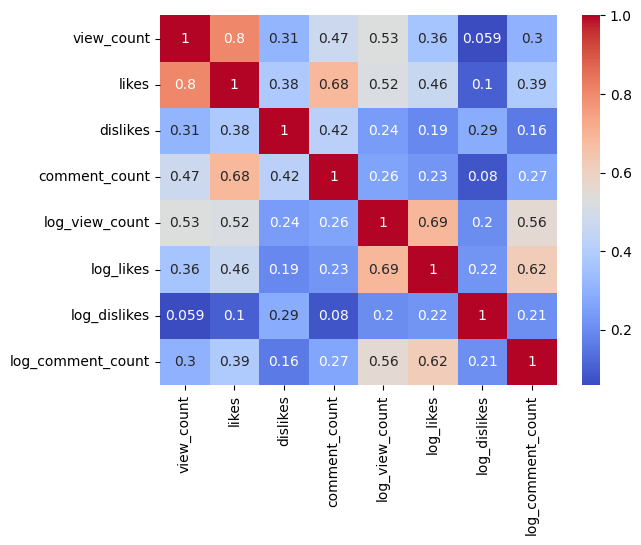

In [ ]:
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])
column_to_exclude = 'categoryId'
numeric_df = numeric_df.drop(columns=[column_to_exclude], errors='ignore')

print(numeric_df.corr())
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

In [ ]:
# changing the time-based columns to be of a datetime type
dataset['publishedAt'] = pd.to_datetime(dataset['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
#print(dataset['publishedAt'].dtype)
dataset['trending_date'] = pd.to_datetime(dataset['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')
#print(dataset['trending_date'].dtype)

# rounding time-based columns to only be as specific as days
dataset['publishedAt'] = dataset['publishedAt'].dt.round('D')
dataset['trending_date'] = dataset['trending_date'].dt.round('D')

# making new column for time difference between when video is published and day it is trending on
# (in terms of days)
dataset['time_difference'] = dataset['trending_date'] - dataset['publishedAt']

# making new column for time difference btw published time and trending day
# (looking at just days)
dataset['days_difference'] = dataset['time_difference'].dt.days

# #finds all time differences less or equal to zero and replaces with 1
trending_same_day = dataset['days_difference']<1
print(trending_same_day.value_counts())
dataset.loc[trending_same_day, 'days_difference'] = 1
trending_same_day = dataset['days_difference']<1
print(trending_same_day.value_counts())

# dataset['time_difference'] = dataset['time_difference'].dt.total_seconds() / 3600
# negative_time_diff = dataset['time_difference'] < 1
# dataset.loc[negative_time_diff, 'time_difference'] = 1

#print(dataset['time_difference'].dtype)
#print(dataset['days_difference'].dtype)


days_difference
False    251224
True      17400
Name: count, dtype: int64
days_difference
False    268624
Name: count, dtype: int64


In [ ]:
dataset['month'] = dataset['publishedAt'].dt.month_name()
one_hot_encoded_months = pd.get_dummies(dataset['month'], prefix='month')
dataset = pd.concat([dataset, one_hot_encoded_months], axis=1)
dataset['day_of_week'] = dataset['publishedAt'].dt.day_name()
one_hot_encoded_days = pd.get_dummies(dataset['day_of_week'], prefix='day')
dataset = pd.concat([dataset, one_hot_encoded_days], axis=1)
dataset.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,month_October,month_September,day_of_week,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
219276,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11,UCxbgnfIEf9Y7_g9QU9URRkg,DevonColeVEVO,Music,2023-08-11,"Devon Cole Lyrics,Lyrics,Devon Cole official,D...",2658,648,...,False,False,Friday,True,False,False,False,False,False,False
190453,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music ...,2023-03-18,UCulNMpwUyp_DPbec4J-Yt2g,Taleban Dooda,Music,2023-03-18,"taleban dooda,drill,tampa drill,drill music,co...",5835,762,...,False,False,Saturday,False,False,True,False,False,False,False
197246,51z16hgJk7Y,Ari Abdul - You (Official Video),2023-04-21,UCHbPv5dUjv-_ACjcs01QbPg,AriAbdulVEVO,Music,2023-04-21,"Ari abdul,ari abdul babydoll,ari abdul babydol...",7400,1890,...,False,False,Friday,True,False,False,False,False,False,False
190683,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music ...,2023-03-18,UCulNMpwUyp_DPbec4J-Yt2g,Taleban Dooda,Music,2023-03-19,"taleban dooda,drill,tampa drill,drill music,co...",10808,1134,...,False,False,Saturday,False,False,True,False,False,False,False
219498,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11,UCxbgnfIEf9Y7_g9QU9URRkg,DevonColeVEVO,Music,2023-08-12,"Devon Cole Lyrics,Lyrics,Devon Cole official,D...",11487,1498,...,False,False,Friday,True,False,False,False,False,False,False
190916,Dzae8l3FQng,Taleban Dooda - Come After Me (Official Music ...,2023-03-18,UCulNMpwUyp_DPbec4J-Yt2g,Taleban Dooda,Music,2023-03-20,"taleban dooda,drill,tampa drill,drill music,co...",14310,1317,...,False,False,Saturday,False,False,True,False,False,False,False
219725,SoTTr5ImOsA,Devon Cole - D**khead (Official Video),2023-08-11,UCxbgnfIEf9Y7_g9QU9URRkg,DevonColeVEVO,Music,2023-08-13,"Devon Cole Lyrics,Lyrics,Devon Cole official,D...",16835,1819,...,False,False,Friday,True,False,False,False,False,False,False
223439,8CaRIll0cvI,Yella Beezy - HA HA (Official Video),2023-09-01,UCM5OdysuAWjORR3BGW2ge_w,Yella Beezy,Music,2023-09-01,"Yella Beezy,Southern Hip Hop,Rap,Lil Wayne,Lil...",17238,769,...,False,True,Friday,True,False,False,False,False,False,False
209829,lJ3fkULgtO4,Busta Rhymes - BEACH BALL (Official Music Vide...,2023-06-23,UCFIAkL-_akPk430rbdmPNaw,BustaRhymesVEVO,Music,2023-06-23,"busta,busta rhymes,busta rhymes BIA,bia,beach ...",19751,3061,...,False,False,Friday,True,False,False,False,False,False,False
177606,LrtAATC471E,Diplo - Wasted (Official Video) ft. Kodak Blac...,2023-01-13,UCRtV20m7OBHIyV_mbqsQpxw,DiploVEVO,Music,2023-01-13,"Diplo,Kodak,Black,Koe,Wetzel,Thomas Wesley,Dip...",20587,2872,...,False,False,Friday,True,False,False,False,False,False,False


In [ ]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64', 'bool'])
correlation_matrix = numeric_dataset.corr()
target_correlations = correlation_matrix['view_count'].sort_values(ascending=False)
print(target_correlations)

view_count                          1.000000
likes                               0.801696
log_view_count                      0.529135
comment_count                       0.469338
log_likes                           0.360782
days_difference                     0.351884
dislikes                            0.311383
log_comment_count                   0.300883
categoryId_Entertainment            0.087133
categoryId_Music                    0.071565
day_Sunday                          0.059903
log_dislikes                        0.059270
day_Friday                          0.032944
month_August                        0.009367
month_December                      0.009232
ratings_disabled                    0.006407
month_March                         0.004843
month_October                       0.004498
month_July                          0.003369
month_June                          0.003299
comments_disabled                   0.001127
categoryId_Science & Technology     0.000340
categoryId

In [ ]:

# Datetime format
dataset['trending_date'] = pd.to_datetime(dataset['trending_date'])

# Sorting values
dataset = dataset.sort_values(by=['video_id', 'trending_date'])

# dataset['likes_per_day'] = dataset.groupby('video_id')['likes'].diff().fillna(dataset['likes'])
# dataset['dislikes_per_day'] = dataset.groupby('video_id')['dislikes'].diff().fillna(dataset['dislikes'])
# dataset['comments_per_day'] = dataset.groupby('video_id')['comment_count'].diff().fillna(dataset['comment_count'])

dataset['likes_per_day'] = dataset['likes']/dataset['days_difference']
dataset['dislikes_per_day'] = dataset['dislikes']/dataset['days_difference']
dataset['comments_per_day'] = dataset['comment_count']/dataset['days_difference']
dataset['views_per_day'] = dataset['view_count']/dataset['days_difference']

print(dataset.head())


          video_id                               title publishedAt  \
60792  --14w5SOEUs                   Migos - Avalanche  2021-06-11   
60991  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61197  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61398  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61605  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   

                      channelId channelTitle categoryId trending_date  \
60792  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-11   
60991  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-11   
61197  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-12   
61398  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-12   
61605  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-13   

                                                    tags  view_count   likes  \
60792  Migos,Avalanche,Quality,Control,Music/Motown,R...    

In [ ]:
channel_avg_dislikes = dataset[dataset['ratings_disabled'] == False].groupby('channelTitle')['dislikes'].mean()

overall_avg_dislikes = dataset[dataset['ratings_disabled'] == False]['dislikes'].mean()

def fill_dislikes(row):
    if row['ratings_disabled'] == True or row['dislikes'] == 0:  # If dislikes are disabled or zero
        if row['channelTitle'] in channel_avg_dislikes:
            return channel_avg_dislikes[row['channelTitle']]
        else:
            return overall_avg_dislikes
    else:
        return row['dislikes']


dataset['dislikes'] = dataset.apply(fill_dislikes, axis=1)


channel_avg_comments = dataset[dataset['comments_disabled'] == False].groupby('channelTitle')['comment_count'].mean()


overall_avg_comments = dataset[dataset['comments_disabled'] == False]['comment_count'].mean()

def fill_comments(row):
    if row['comments_disabled'] == True or row['comment_count'] == 0:  # If comments are disabled or zero
        if row['channelTitle'] in channel_avg_comments:
            return channel_avg_comments[row['channelTitle']]
        else:
            return overall_avg_comments
    else:
        return row['comment_count']


dataset['comment_count'] = dataset.apply(fill_comments, axis=1)



In [ ]:
print(dataset.columns)

dataset.head()
dataset.shape

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'log_view_count', 'log_likes',
       'log_dislikes', 'log_comment_count', 'categoryId_Autos & Vehicles',
       'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment',
       'categoryId_Film & Animation', 'categoryId_Gaming',
       'categoryId_Howto & Style', 'categoryId_Music',
       'categoryId_News & Politics', 'categoryId_Nonprofits & Activism',
       'categoryId_People & Blogs', 'categoryId_Pets & Animals',
       'categoryId_Science & Technology', 'categoryId_Sports',
       'categoryId_Travel & Events', 'time_difference', 'days_difference',
       'month', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_Ma

(268624, 62)

after adding new logs to dataset, the dataset looks like
Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'log_view_count', 'log_likes',
       'log_dislikes', 'log_comment_count', 'categoryId_Autos & Vehicles',
       'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment',
       'categoryId_Film & Animation', 'categoryId_Gaming',
       'categoryId_Howto & Style', 'categoryId_Music',
       'categoryId_News & Politics', 'categoryId_Nonprofits & Activism',
       'categoryId_People & Blogs', 'categoryId_Pets & Animals',
       'categoryId_Science & Technology', 'categoryId_Sports',
       'categoryId_Travel & Events', 'time_difference', 'days_difference',
       'month', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'm

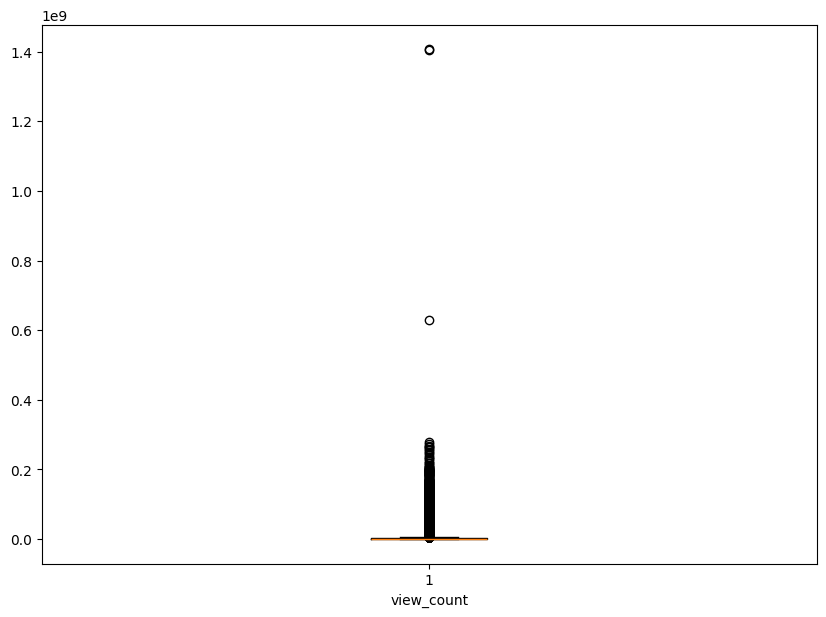

count    2.686240e+05
mean     1.315242e+05
std      4.540737e+05
min      0.000000e+00
25%      1.797800e+04
50%      4.021700e+04
75%      9.885200e+04
max      1.602153e+07
Name: likes, dtype: float64
Number of outliers in likes: 3110


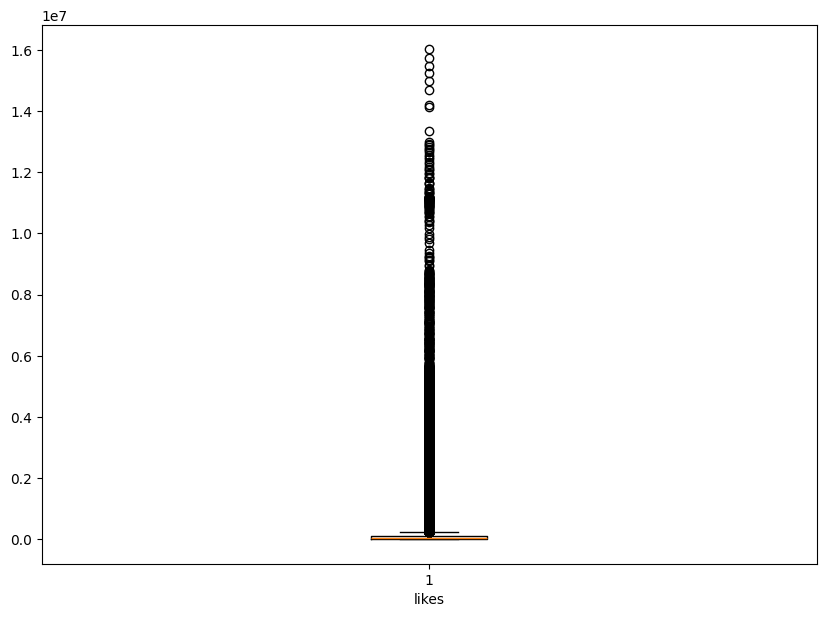

count    268624.000000
mean       1568.232315
std        8156.548299
min           0.000000
25%          57.265152
50%         347.633929
75%        1083.000000
max      879354.000000
Name: dislikes, dtype: float64
Number of outliers in dislikes: 2031


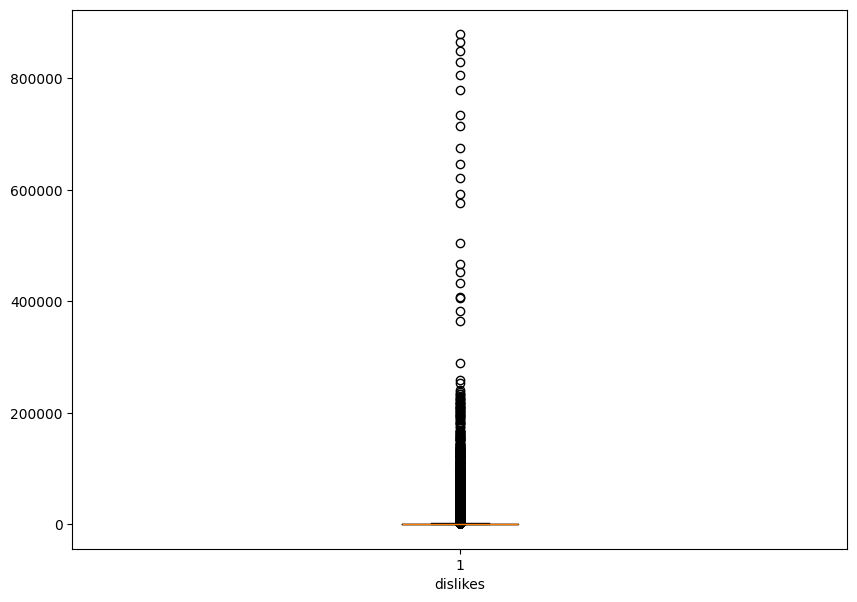

count    2.686240e+05
mean     1.025082e+04
std      7.262465e+04
min      0.000000e+00
25%      1.336000e+03
50%      2.836000e+03
75%      6.618000e+03
max      6.738537e+06
Name: comment_count, dtype: float64
Number of outliers in comment_count: 1001


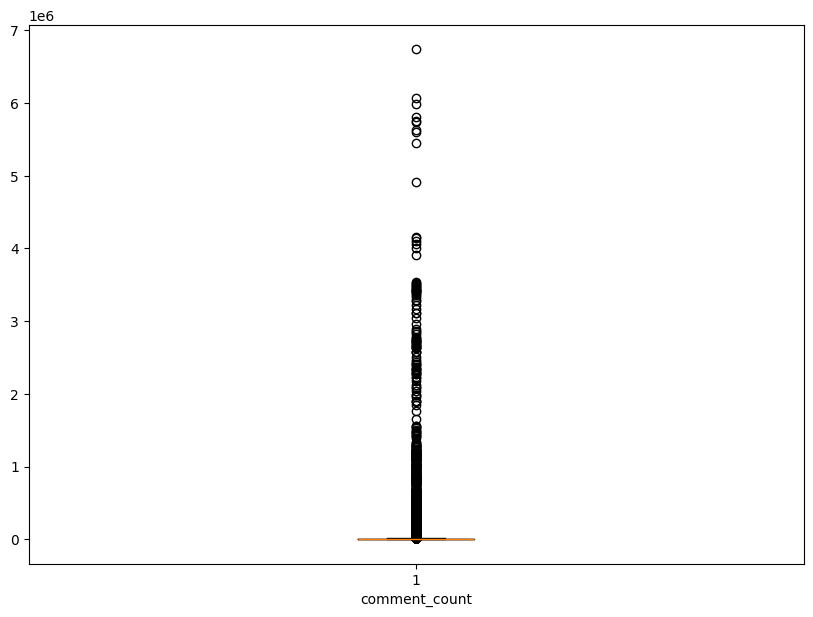

count    268624.000000
mean         13.891617
std           1.147896
min           7.885705
25%          13.066617
50%          13.750754
75%          14.560762
max          21.065183
Name: log_view_count, dtype: float64
Number of outliers in log_view_count: 2548


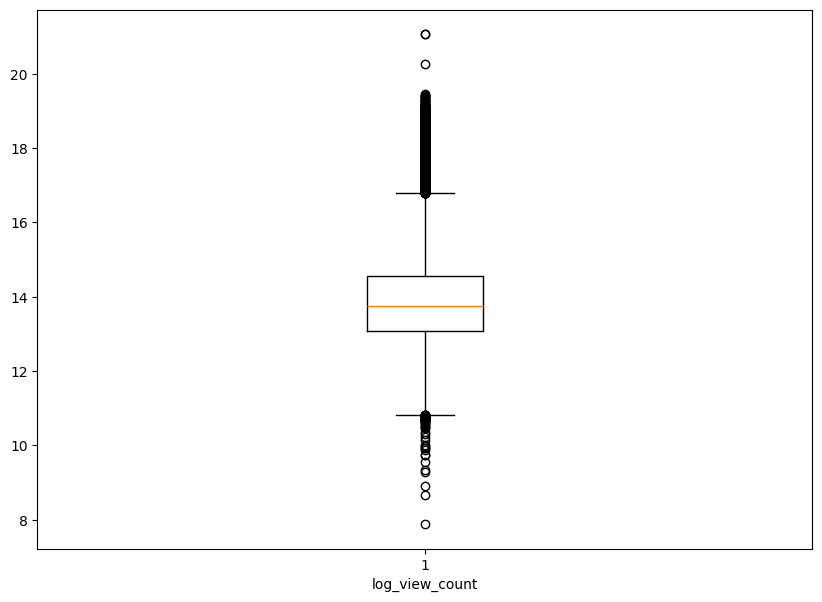

count    268624.000000
mean         10.609787
std           1.586233
min           0.000000
25%           9.796960
50%          10.602070
75%          11.501389
max          16.589444
Name: log_likes, dtype: float64
Number of outliers in log_likes: 2250


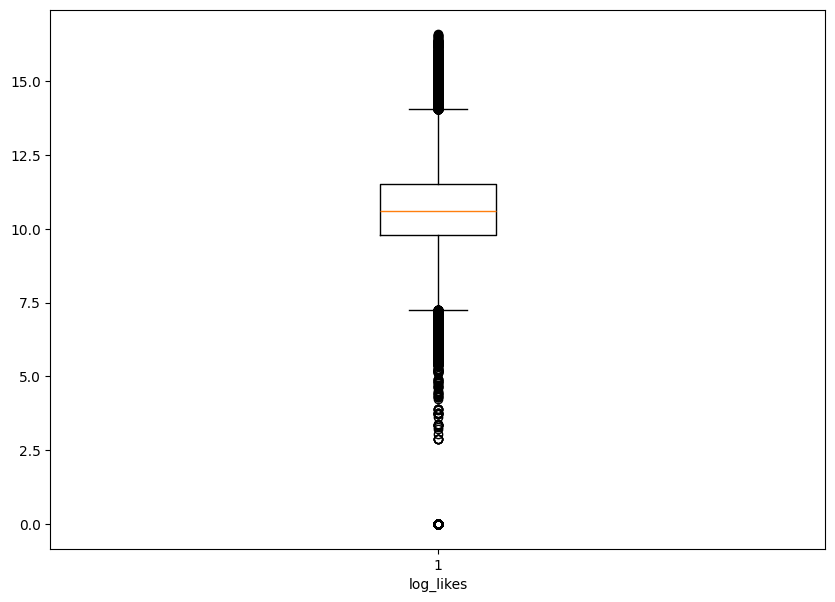

count    268624.000000
mean          5.073677
std           2.842038
min           0.000000
25%           4.065004
50%           5.854022
75%           6.988413
max          13.686944
Name: log_dislikes, dtype: float64
Number of outliers in log_dislikes: 5


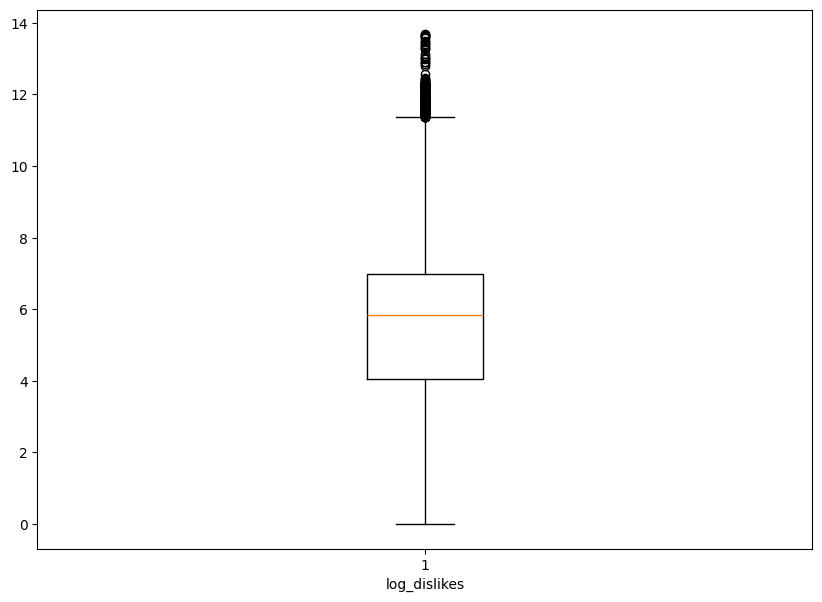

count    268624.000000
mean          8.020844
std           1.352016
min           0.000000
25%           7.198184
50%           7.950502
75%           8.797700
max          15.723354
Name: log_comment_count, dtype: float64
Number of outliers in log_comment_count: 2545


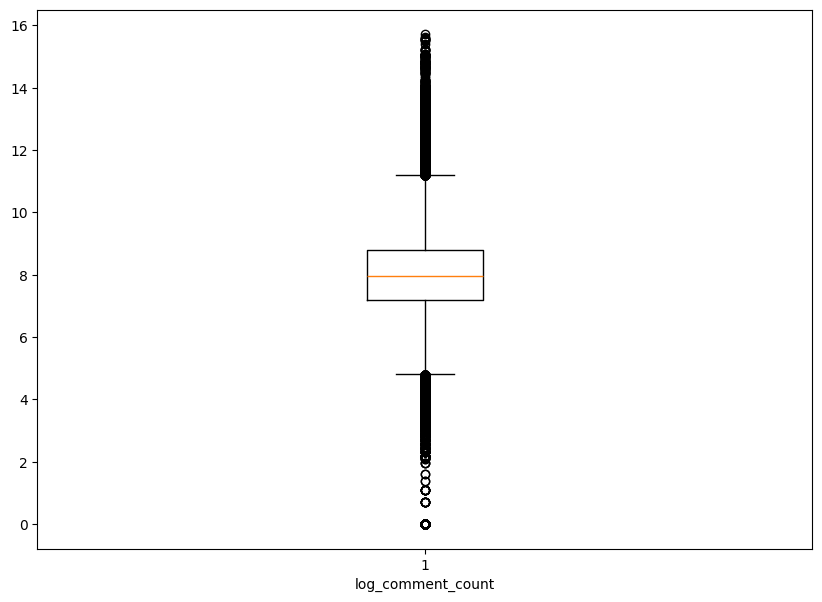

count    2.686240e+05
mean     4.611844e+04
std      1.538248e+05
min      0.000000e+00
25%      6.097667e+03
50%      1.476755e+04
75%      3.714208e+04
max      1.336120e+07
Name: likes_per_day, dtype: float64
Number of outliers in likes_per_day: 2821


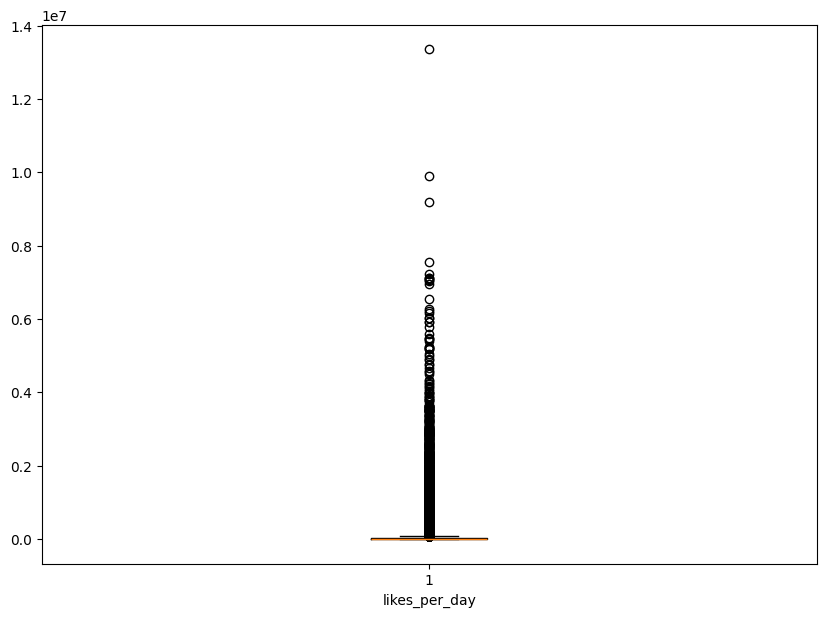

count    268624.000000
mean        391.610679
std        2746.474794
min           0.000000
25%           0.000000
50%           0.000000
75%         174.250000
max      592573.000000
Name: dislikes_per_day, dtype: float64
Number of outliers in dislikes_per_day: 1746


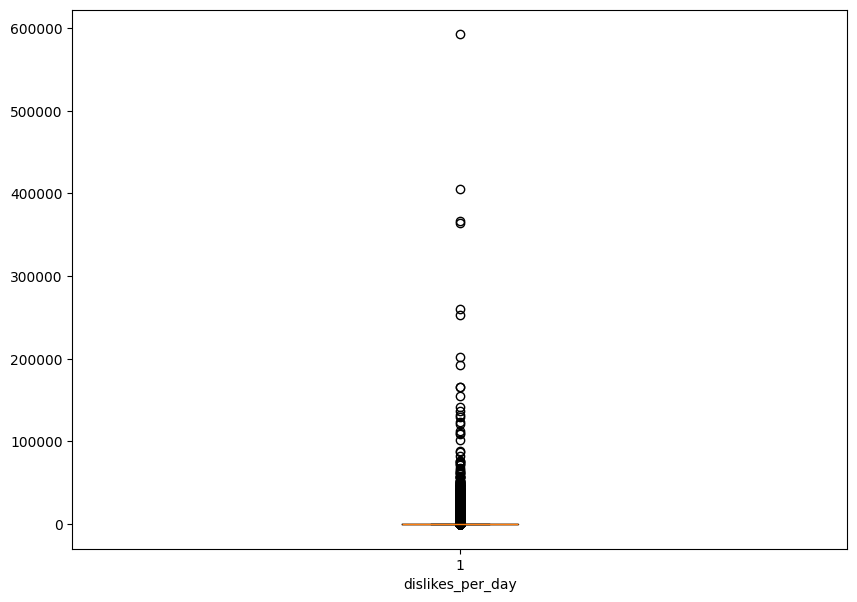

count    2.686240e+05
mean     3.746257e+03
std      3.096451e+04
min      0.000000e+00
25%      4.223214e+02
50%      1.001139e+03
75%      2.482688e+03
max      5.594286e+06
Name: comments_per_day, dtype: float64
Number of outliers in comments_per_day: 825


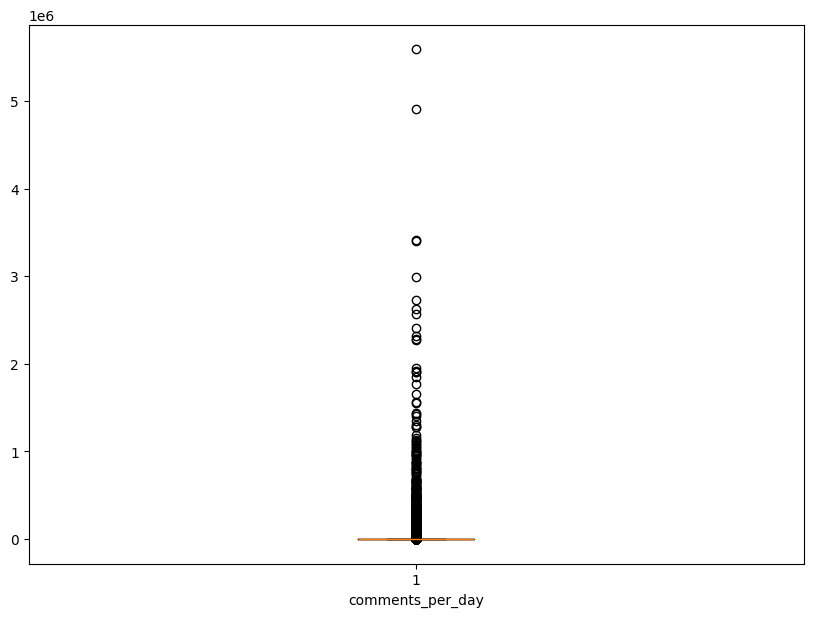

count    2.686240e+05
mean     8.566747e+05
std      3.891333e+06
min      2.658000e+03
25%      1.718558e+05
50%      3.494078e+05
75%      7.758871e+05
max      1.407644e+09
Name: views_per_day, dtype: float64
Number of outliers in views_per_day: 1310


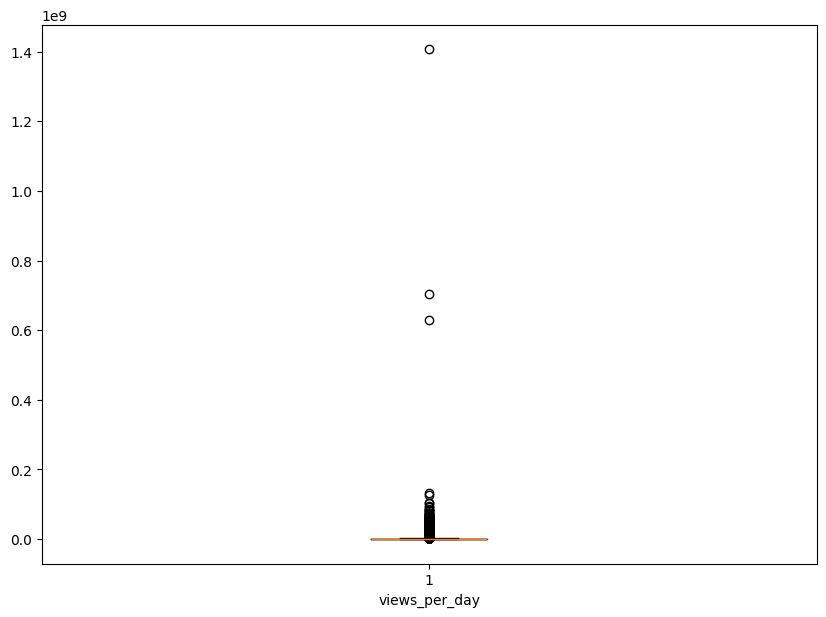

count    268624.000000
mean          9.582780
std           1.592270
min           0.000000
25%           8.715825
50%           9.600255
75%          10.522533
max          16.407865
Name: log_likes_per_day, dtype: float64
Number of outliers in log_likes_per_day: 2123


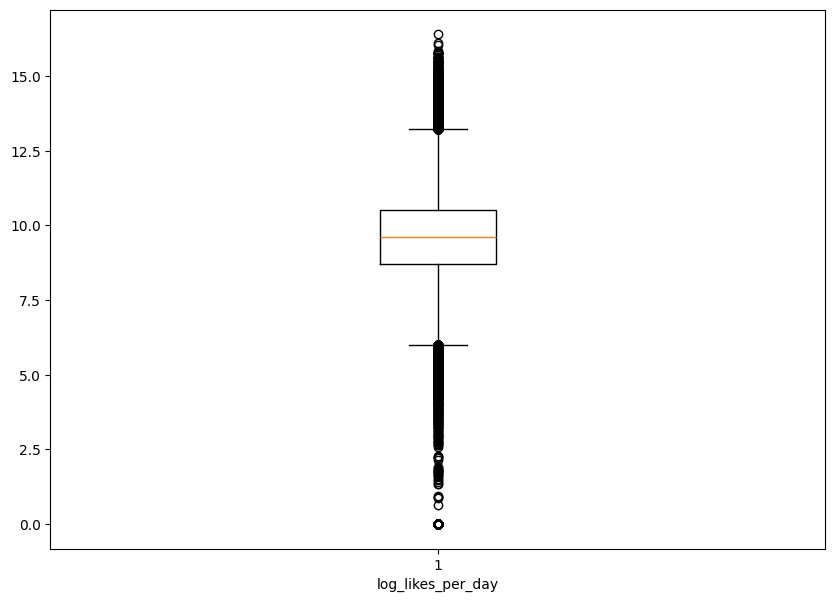

count    268624.000000
mean          2.145487
std           2.947763
min           0.000000
25%           0.000000
50%           0.000000
75%           5.166214
max          13.292231
Name: log_dislikes_per_day, dtype: float64
Number of outliers in log_dislikes_per_day: 37


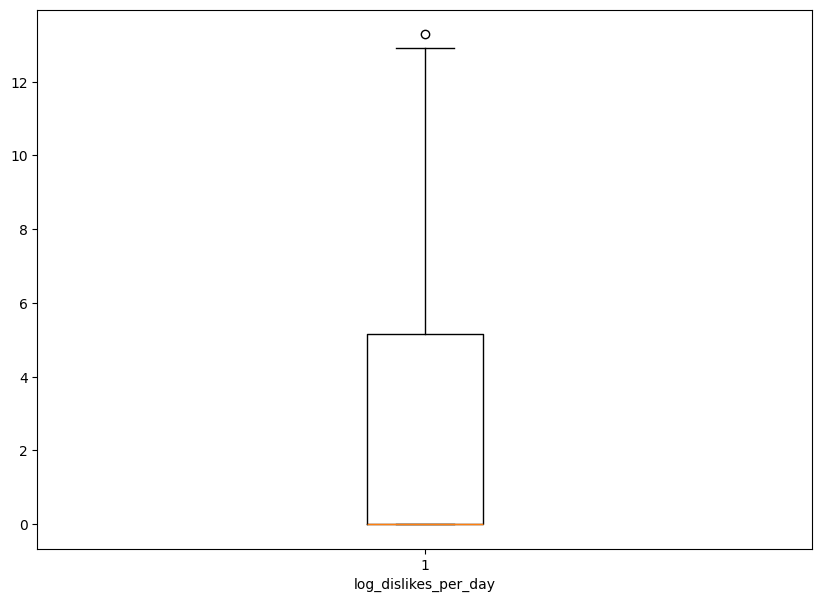

count    268624.000000
mean          6.885047
std           1.631862
min           0.000000
25%           6.048132
50%           6.909892
75%           7.817500
max          15.537256
Name: log_comments_per_day, dtype: float64
Number of outliers in log_comments_per_day: 5270


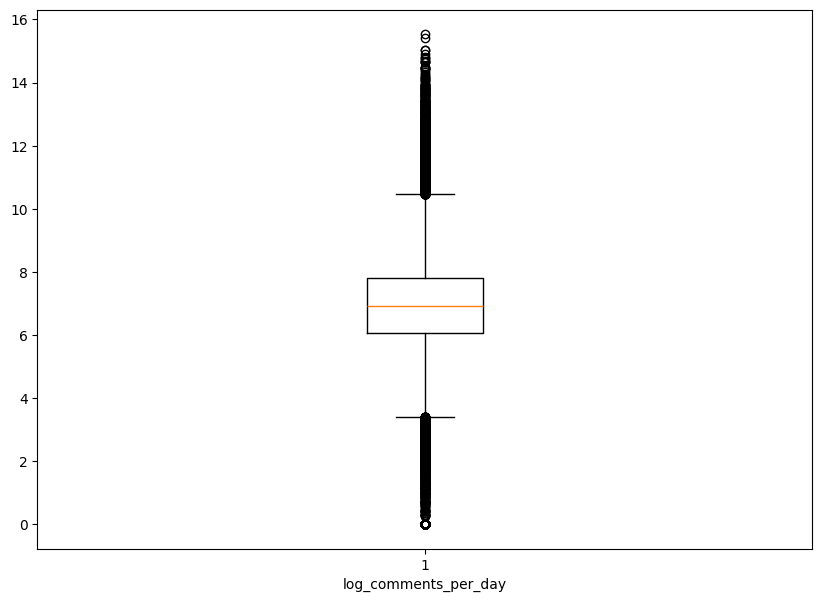

count    268624.000000
mean         12.859075
std           1.140406
min           7.885705
25%          12.054417
50%          12.763998
75%          13.561764
max          21.065183
Name: log_views_per_day, dtype: float64
Number of outliers in log_views_per_day: 1515


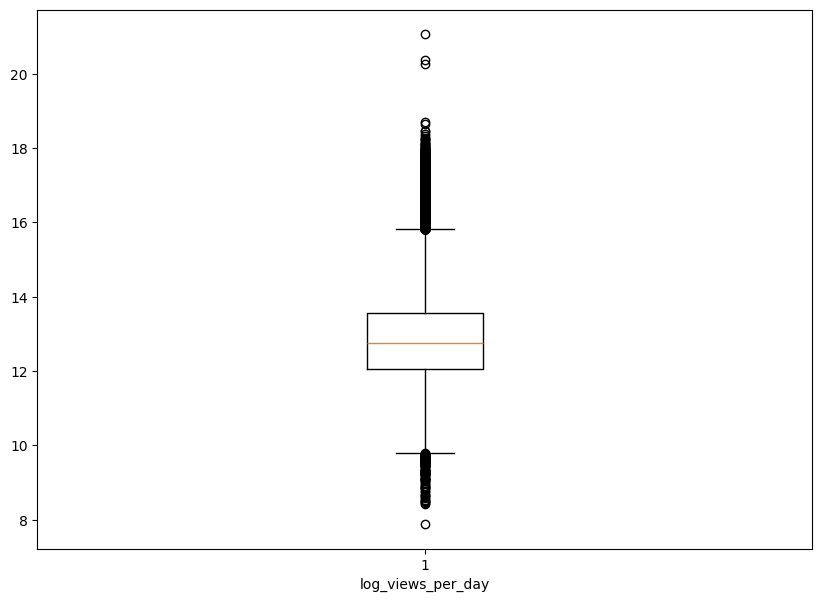

Total number of outliers: 9962
(258662, 68)


In [ ]:
num_columns = dataset.select_dtypes(include=['float64', 'int64'])
# print(num_columns.columns)
# print(num_columns.shape[1])
if 'categoryId' in num_columns.columns:
  num_columns = num_columns.drop(columns = ["categoryId"], axis = 1)
#make sure each new column has a log version
for column in num_columns.columns:
  if('log' not in column):
    logColumnName = 'log_' + column
    dataset[logColumnName] = np.log(dataset[column] + 1)
# print(num_columns.shape[1])
# print(dataset['categoryId'])
# print(num_columns.columns)

#update columns to include the new log columns
num_columns = dataset.select_dtypes(include=['float64', 'int64'])


if "time_difference" in num_columns.columns:
  num_columns = num_columns.drop(columns = ["time_difference"], axis = 1)
if "days_difference" in num_columns.columns:
  num_columns = num_columns.drop(columns = ["days_difference"], axis = 1)
if "log_time_difference" in num_columns.columns:
  num_columns = num_columns.drop(columns = ["log_time_difference"], axis = 1)
if "log_days_difference" in num_columns.columns:
  num_columns = num_columns.drop(columns = ["log_days_difference"], axis = 1)

print("after adding new logs to dataset, the dataset looks like")
print(dataset.columns)
print("after adding new logs to num_columns and getting rid of time_difference and days_difference")
print(num_columns.columns)


threshold = 3.0
z_list = []
dataset['z'] = False
for column in num_columns:
  print(dataset[column].describe())
  # Calculate the z-score for column
  # z_col_name = 'z_' + column
  # z_list.append(z_col_name)
  z_score = np.abs(stats.zscore(dataset[column]))

  # Identify outliers as a z-score greater than 3
  col = z_score > threshold
  print(f"Number of outliers in {column}: {col.sum()}")
  if 'log' in column:
    dataset['z'] = dataset['z'] | col
  fig = plt.figure(figsize =(10, 7))
  plt.boxplot(dataset[column])
  plt.xlabel(column)
  plt.show()


total_outliers = dataset['z'].sum()
print(f"Total number of outliers: {total_outliers}")
dataset.head(10)

# FLAG THIS AS ISSUE
# running this section of the code currently drops every row of our data
# think we're going to need to change how we deal with outliers
# (maybe only look at log per day values) and this will lead to still having some of the data?
# print(dataset['z'].value_counts())
dataset = dataset.drop(dataset[dataset['z'] == True].index)
print(dataset.shape)


In [ ]:
print(dataset['z'].head(10))

60792    False
60991    False
61197    False
61398    False
61605    False
61818    False
62030    False
62243    False
62481    False
62681    False
Name: z, dtype: bool


In [ ]:
print(dataset.head(10))
print(dataset.shape)

          video_id                               title publishedAt  \
60792  --14w5SOEUs                   Migos - Avalanche  2021-06-11   
60991  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61197  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61398  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61605  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
61818  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
62030  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
62243  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
62481  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   
62681  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-11   

                      channelId channelTitle categoryId trending_date  \
60792  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-11   
60991  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO      Music    2021-06-11   
61197  UCG

In [ ]:
date_count = dataset['trending_date'] < dataset['publishedAt']
print(date_count.value_counts())
print((dataset['days_difference'] <= 0.1).value_counts())
dataset[date_count]
dataset = dataset.drop([25691, 52595])

False    258660
True          2
Name: count, dtype: int64
days_difference
False    258662
Name: count, dtype: int64


In [ ]:
#Sort the dataset so all same videos grouped together and from oldest to recent trending so that you can count the times the video trended before
dataset = dataset.drop_duplicates(subset=["video_id","trending_date"], keep="last")
dataset.sort_values(by=['video_id', 'trending_date'], inplace=True)
dataset = dataset.reset_index(drop=True)

dataset['trending_count'] = 0
count = 0
past_video = None
for ind in range(0,dataset.shape[0]):

  current_video = dataset.iloc[ind]
  if past_video is None or past_video['video_id'] == current_video['video_id']:
    dataset.at[ind, 'trending_count'] = count
    count += 1
  else:
    count = 0
  past_video = current_video

# print(dataset.iloc[0])


#notes from observation: a video can trend more than once on a date.


print(dataset.head(10))
print(dataset.shape)

      video_id                                       title publishedAt  \
0  --14w5SOEUs          Migos - Avalanche (Official Video)  2021-06-11   
1  --14w5SOEUs          Migos - Avalanche (Official Video)  2021-06-11   
2  --14w5SOEUs          Migos - Avalanche (Official Video)  2021-06-11   
3  --14w5SOEUs          Migos - Avalanche (Official Video)  2021-06-11   
4  --14w5SOEUs          Migos - Avalanche (Official Video)  2021-06-11   
5  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF  2022-03-10   
6  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF  2022-03-10   
7  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF  2022-03-10   
8  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF  2022-03-10   
9  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys  2021-09-20   

                  channelId        channelTitle     categoryId trending_date  \
0  UCGIelM2Dj3zza3xyV3pL3WQ           MigosVEVO          Music    2021-06-11   
1  UCGIelM2Dj3zza3xyV3pL3

In [ ]:
# organizing dataset by date for spliting up dataset into time based!
dataset['publishedAt'] = pd.to_datetime(dataset['publishedAt'])  # Ensure the column is in datetime format
dataset_sorted = dataset.sort_values(by='publishedAt', ascending=True)

In [ ]:
total_rows = len(dataset_sorted)
train_size = int(total_rows * 0.90)
val_size = int(total_rows * 0.05)
test_size = total_rows - train_size - val_size
train_data = dataset_sorted.iloc[:train_size]  # First 90% for training
val_data = dataset_sorted.iloc[train_size:train_size + val_size]  # Next 5% for validation
test_data = dataset_sorted.iloc[train_size + val_size:]  # Remaining 5% for testing

# Print sizes to confirm
print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 229357
Validation data size: 12742
Testing data size: 12743


In [ ]:
# Dropping columns
dataset = dataset.drop(columns=['trending_date'], axis=1)
dataset = dataset.drop(columns=['publishedAt'], axis=1)
dataset = dataset.drop(columns=['channelId'], axis=1)
dataset = dataset.drop(columns=['time_difference'], axis=1)
dataset = dataset.drop(columns=['video_id'], axis=1)

dataset_sorted = dataset_sorted.drop(columns=['trending_date'], axis=1)
dataset_sorted = dataset_sorted.drop(columns=['publishedAt'], axis=1)
dataset_sorted = dataset_sorted.drop(columns=['channelId'], axis=1)
dataset_sorted = dataset_sorted.drop(columns=['time_difference'], axis=1)
dataset_sorted = dataset_sorted.drop(columns=['video_id'], axis=1)

print(dataset.columns)

Index(['title', 'channelTitle', 'categoryId', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'log_view_count', 'log_likes',
       'log_dislikes', 'log_comment_count', 'categoryId_Autos & Vehicles',
       'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment',
       'categoryId_Film & Animation', 'categoryId_Gaming',
       'categoryId_Howto & Style', 'categoryId_Music',
       'categoryId_News & Politics', 'categoryId_Nonprofits & Activism',
       'categoryId_People & Blogs', 'categoryId_Pets & Animals',
       'categoryId_Science & Technology', 'categoryId_Sports',
       'categoryId_Travel & Events', 'days_difference', 'month', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'day_of_week',
       'da

In [ ]:
dataset.head(10)

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,...,dislikes_per_day,comments_per_day,views_per_day,log_days_difference,log_likes_per_day,log_dislikes_per_day,log_comments_per_day,log_views_per_day,z,trending_count
0,Migos - Avalanche (Official Video),MigosVEVO,Music,"Migos,Avalanche,Quality,Control,Music/Motown,R...",2146104,167034,1755.0,12998.0,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,...,1755.000000,12998.000000,2.146104e+06,0.693147,12.025959,7.470794,9.472628,14.579165,False,0
1,Migos - Avalanche (Official Video),MigosVEVO,Music,"Migos,Avalanche,Quality,Control,Music/Motown,R...",3963014,218568,2847.0,15442.0,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,...,2847.000000,15442.000000,3.963014e+06,0.693147,12.294857,7.954372,9.644911,15.192516,False,1
2,Migos - Avalanche (Official Video),MigosVEVO,Music,"Migos,Avalanche,Quality,Control,Music/Motown,R...",5167987,240113,3414.0,16241.0,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,...,1707.000000,8120.500000,2.583994e+06,1.098612,11.695726,7.443078,9.002270,14.764847,False,2
3,Migos - Avalanche (Official Video),MigosVEVO,Music,"Migos,Avalanche,Quality,Control,Music/Motown,R...",6078723,252005,3778.0,16228.0,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,...,1259.333333,5409.333333,2.026241e+06,1.386294,11.338604,7.139132,8.596066,14.521693,False,3
4,Migos - Avalanche (Official Video),MigosVEVO,Music,"Migos,Avalanche,Quality,Control,Music/Motown,R...",6823249,262692,4107.0,16445.0,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,...,1026.750000,4111.250000,1.705812e+06,1.609438,11.092458,6.935127,8.321726,14.349553,False,4
5,MY TESLA PAYS FOR ITSELF,jf.okay,Entertainment,[None],466980,16481,0.0,1278.0,https://i.ytimg.com/vi/--2O86Z0hsM/default.jpg,False,...,0.000000,1278.000000,4.669800e+05,0.693147,9.710024,0.000000,7.153834,13.054044,False,0
6,MY TESLA PAYS FOR ITSELF,jf.okay,Entertainment,[None],506401,16829,0.0,1433.0,https://i.ytimg.com/vi/--2O86Z0hsM/default.jpg,False,...,0.000000,477.666667,1.688003e+05,1.386294,8.632425,0.000000,6.171004,12.036478,False,0
7,MY TESLA PAYS FOR ITSELF,jf.okay,Entertainment,[None],519009,16978,0.0,1362.0,https://i.ytimg.com/vi/--2O86Z0hsM/default.jpg,False,...,0.000000,340.500000,1.297522e+05,1.609438,8.353615,0.000000,5.833348,11.773390,False,1
8,MY TESLA PAYS FOR ITSELF,jf.okay,Entertainment,[None],538485,17290,0.0,1439.0,https://i.ytimg.com/vi/--2O86Z0hsM/default.jpg,False,...,0.000000,287.800000,1.076970e+05,1.791759,8.148735,0.000000,5.665734,11.587086,False,2
9,Supporting Actress in a Comedy: 73rd Emmys,Television Academy,Entertainment,[None],527742,6299,286.0,586.0,https://i.ytimg.com/vi/--40TEbZ9Is/default.jpg,False,...,286.000000,586.000000,5.277420e+05,0.693147,8.748305,5.659482,6.375025,13.176365,False,0


In [ ]:
# Define X (features) and y (target)
X = dataset.drop('log_views_per_day', axis = 1)
y = dataset['log_views_per_day']

# Split data into training (90%), test (5%), and validation (5%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
X = dataset_sorted.drop('log_views_per_day', axis = 1) # Or log_views_per_day ?
y = dataset_sorted['log_views_per_day']

# Split data into training (90%), test (5%), and validation (5%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
X_train.head(10)
# X_test.head()
# X_val.head()

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,...,likes_per_day,dislikes_per_day,comments_per_day,views_per_day,log_days_difference,log_likes_per_day,log_dislikes_per_day,log_comments_per_day,z,trending_count
217524,Try Guys Make Hand Pulled Noodles with No Recipe,The Try Guys,Comedy,"try guys,keith,ned,zach,eugene,habersberger,fu...",1016287,52117,434.665236,2060.0,https://i.ytimg.com/vi/qVXxc9UWz0g/default.jpg,False,...,52117.00,0.0,2060.000000,1.016287e+06,0.693147,10.861266,0.000000,7.630947,False,0
74499,How To Terraform Mars - WITH LASERS,Kurzgesagt – In a Nutshell,Education,[None],3779255,197316,1293.590022,12101.0,https://i.ytimg.com/vi/HpcTJW4ur54/default.jpg,False,...,32886.00,0.0,2016.833333,6.298758e+05,1.945910,10.400833,0.000000,7.609780,False,5
236775,"Beyoncé, Blue Ivy, SAINt JHN, WizKid - BROWN S...",BeyoncéVEVO,Music,"Beyoncé,Lion King,The Lion King,Disney,Officia...",4979080,390017,7288.000000,27447.0,https://i.ytimg.com/vi/vRFS0MYTC1I/default.jpg,False,...,195008.50,3644.0,13723.500000,2.489540e+06,1.098612,12.180804,8.201112,9.526938,False,1
89623,You People | feat. Eddie Murphy and Jonah Hill...,Netflix,Entertainment,"America,Anthony Anderson,Black,Clash,Comedy,Cu...",5795206,32419,899.609375,2929.0,https://i.ytimg.com/vi/Lcd0df7jwpM/default.jpg,False,...,32419.00,0.0,2929.000000,5.795206e+06,0.693147,10.386531,0.000000,7.982758,False,0
13869,The Man Who Took Down a $3 Billion Funeral Empire,Ask a Mortician,Education,"funeral home,funeral law,cemetery law,Jeremiah...",612432,46341,0.000000,4266.0,https://i.ytimg.com/vi/2b7nCbCRyIs/default.jpg,False,...,9268.20,0.0,853.200000,1.224864e+05,1.791759,9.134452,0.000000,6.750165,False,4
197714,ARE WE QUITTING YOUTUBE??? | TRENT & ALLIE,Trent & Allie,People & Blogs,"van life,vanlife,trent and allie,eamon and bec...",249130,28498,154.583333,1691.0,https://i.ytimg.com/vi/lkg31-elMd4/default.jpg,False,...,7124.50,0.0,422.750000,6.228250e+04,1.609438,8.871435,0.000000,6.049144,False,3
27805,iOS 14 Homescreen Setup - Tips/Tricks + Favori...,TechMe0ut,Science & Technology,"iOS 14 Setup,iOS 14 homescreen,iOS 14,tips,tri...",503184,12007,352.000000,495.0,https://i.ytimg.com/vi/6AYggGaMRTQ/default.jpg,False,...,12007.00,352.0,495.000000,5.031840e+05,0.693147,9.393328,5.866468,6.206576,False,0
81222,I Busted 31 Myths in Season 2!,SoaR Milo,Gaming,"fortnite,fortnite myths,busting myths in fortn...",643140,13050,156.940741,1473.0,https://i.ytimg.com/vi/JWxQ2OVrk3w/default.jpg,False,...,13050.00,0.0,1473.000000,6.431400e+05,0.693147,9.476620,0.000000,7.295735,False,0
56939,Elden Ring's Lore: Explained!,VaatiVidya,Gaming,"guide,lore,dark,souls,bloodborne,story,vaativi...",2551820,192021,29.711790,11609.0,https://i.ytimg.com/vi/DYDs_Inzkz4/default.jpg,False,...,38404.20,0.0,2321.800000,5.103640e+05,1.791759,10.555948,0.000000,7.750529,False,3
169131,Joshua Bassett - Only a Matter of Time [Offici...,Joshua Bassett,Music,"joshua bassett,Ricky Bowen,anyone else,high sc...",1413596,131221,3752.000000,13055.0,https://i.ytimg.com/vi/eg2KWIpZW-U/default.jpg,False,...,32805.25,938.0,3263.750000,3.533990e+05,1.609438,10.398374,6.844815,8.090938,False,3


In [ ]:
# print(X_train.columns)
X_train['title'] = X_train['title'].apply(lambda row: gensim.utils.simple_preprocess(row))
X_test['title'] = X_test['title'].apply(lambda row: gensim.utils.simple_preprocess(row))
X_val['title'] = X_val['title'].apply(lambda row: gensim.utils.simple_preprocess(row))

In [ ]:
title_unique_tokens_train = set()
X_train['title'].apply(lambda tokens: title_unique_tokens_train.update(tokens))
vocab_size = len(title_unique_tokens_train)
print("Vocabulary size for title based on training data:", vocab_size)
# based on this, want vector size of 13

Vocabulary size for title based on training data: 26766


In [ ]:
word2vec_model_title = gensim.models.Word2Vec(X_train['title'],
                                              vector_size=13,
                                              window=5,
                                              min_count=15)

In [ ]:
X_train['description'] = X_train['description'].fillna('').apply(lambda row: gensim.utils.simple_preprocess(str(row)))
X_test['description'] = X_test['description'].fillna('').apply(lambda row: gensim.utils.simple_preprocess(str(row)))
X_val['description'] = X_val['description'].fillna('').apply(lambda row: gensim.utils.simple_preprocess(str(row)))

In [ ]:
desc_unique_tokens_train = set()
X_train['description'].apply(lambda tokens: desc_unique_tokens_train.update(tokens) if isinstance(tokens, list) else None)
vocab_size = len(desc_unique_tokens_train)
print("Vocabulary size for description based on training data:", vocab_size)
# want to do a vector size of 24

Vocabulary size for description based on training data: 295574


In [ ]:
word2vec_model_desc = gensim.models.Word2Vec(X_train['description'],
                                              vector_size=24,
                                              window=5,
                                              min_count=15)

In [ ]:
X_train['tags'] = X_train['tags'].fillna('').apply(lambda row: [tag.strip().lower() for tag in row.split(',')])
X_test['tags'] = X_test['tags'].fillna('').apply(lambda row: [tag.strip().lower() for tag in row.split(',')])
X_val['tags'] = X_val['tags'].fillna('').apply(lambda row: [tag.strip().lower() for tag in row.split(',')])

In [ ]:
tags_unique_tokens_train = set()
X_train['tags'].apply(lambda tokens: tags_unique_tokens_train.update(tokens) if isinstance(tokens, list) else None)
vocab_size = len(tags_unique_tokens_train)
print("Vocabulary size for tags based on training data:", vocab_size)
# want to do a vector size of 21

Vocabulary size for tags based on training data: 223113


In [ ]:
word2vec_model_tags = gensim.models.Word2Vec(X_train['tags'],
                                              vector_size=21,
                                              window=5,
                                              min_count=15)

In [ ]:
import psutil

def memory_usage():
    memory = psutil.virtual_memory()
    print(f'Used Memory: {memory.used / (1024 ** 2):.2f} MB')

memory_usage()

Used Memory: 5104.00 MB


In [ ]:
# words = set(word2vec_model_title.wv.index_to_key)

# print('Begin transforming X_train')
# X_train_word_embeddings_title = np.array([
#     np.array([word2vec_model_title.wv[word] for word in training_example if word in word2vec_model_title.wv], dtype=object)
#     for training_example in X_train['title']
# ], dtype=object)
# print('Finish transforming X_train')

# print('Begin transforming X_test')
# X_test_word_embeddings_title = np.array([
#     np.array([word2vec_model_title.wv[word] for word in training_example if word in word2vec_model_title.wv], dtype=object)
#     for training_example in X_test['title']
# ], dtype=object)
# print('Finish transforming X_test')

# print('Begin transforming X_val')
# X_val_word_embeddings_title = np.array([
#     np.array([word2vec_model_title.wv[word] for word in training_example if word in word2vec_model_title.wv], dtype=object)
#     for training_example in X_val['title']
# ], dtype=object)
# print('Finish transforming X_val')

In [ ]:
# Extract words from the Word2Vec model
desc_words = set(word2vec_model_desc.wv.index_to_key)
title_words = set(word2vec_model_title.wv.index_to_key)
tag_words = set(word2vec_model_tags.wv.index_to_key)


# Get unique descriptions as tuples for each dataset
desc_unique_descriptions_train = X_train['description'].apply(tuple).unique()
desc_unique_descriptions_test = X_test['description'].apply(tuple).unique()
desc_unique_descriptions_val = X_val['description'].apply(tuple).unique()

title_unique_descriptions_train = X_train['title'].apply(tuple).unique()
title_unique_descriptions_test = X_test['title'].apply(tuple).unique()
title_unique_descriptions_val = X_val['title'].apply(tuple).unique()

tags_unique_descriptions_train = X_train['tags'].apply(tuple).unique()
tags_unique_descriptions_test = X_test['tags'].apply(tuple).unique()
tags_unique_descriptions_val = X_val['tags'].apply(tuple).unique()

# Initialize the cache for embeddings
desc_embeddings_cache = {}

title_embeddings_cache = {}

tags_embeddings_cache = {}

# Function to compute and cache embeddings
def cache_embeddings(unique_descriptions, model, cache):
    for desc_tuple in unique_descriptions:
        desc_list = list(desc_tuple)  # Convert tuple back to list
        # Only compute embeddings if the text is not in the cache
        if desc_tuple not in cache:
            embeddings = [model.wv[word] for word in desc_list if word in model.wv]
            if embeddings:
              cache[desc_tuple] = np.mean(embeddings, axis=0)
            else:
              cache[desc_tuple] = np.zeros(model.vector_size)

# Cache embeddings for each dataset
cache_embeddings(desc_unique_descriptions_train, word2vec_model_desc, desc_embeddings_cache)
cache_embeddings(desc_unique_descriptions_test, word2vec_model_desc, desc_embeddings_cache)
cache_embeddings(desc_unique_descriptions_val, word2vec_model_desc, desc_embeddings_cache)

cache_embeddings(title_unique_descriptions_train, word2vec_model_title, title_embeddings_cache)
cache_embeddings(title_unique_descriptions_test, word2vec_model_title, title_embeddings_cache)
cache_embeddings(title_unique_descriptions_val, word2vec_model_title, title_embeddings_cache)


cache_embeddings(tags_unique_descriptions_train, word2vec_model_tags, tags_embeddings_cache)
cache_embeddings(tags_unique_descriptions_test, word2vec_model_tags, tags_embeddings_cache)
cache_embeddings(tags_unique_descriptions_val, word2vec_model_tags, tags_embeddings_cache)
# Get word embeddings for X_train, X_test, and X_val using the cached embeddings
X_train_word_embeddings_desc = np.array([
    desc_embeddings_cache[tuple(desc)] for desc in X_train['description']
], dtype=object)

X_test_word_embeddings_desc = np.array([
    desc_embeddings_cache[tuple(desc)] for desc in X_test['description']
], dtype=object)

X_val_word_embeddings_desc = np.array([
    desc_embeddings_cache[tuple(desc)] for desc in X_val['description']
], dtype=object)

del desc_embeddings_cache


X_train_word_embeddings_title = np.array([
    title_embeddings_cache[tuple(desc)] for desc in X_train['title']
], dtype=object)

X_test_word_embeddings_title = np.array([
    title_embeddings_cache[tuple(desc)] for desc in X_test['title']
], dtype=object)

X_val_word_embeddings_title = np.array([
    title_embeddings_cache[tuple(desc)] for desc in X_val['title']
], dtype=object)

del title_embeddings_cache

X_train_word_embeddings_tags = np.array([
    tags_embeddings_cache[tuple(desc)] for desc in X_train['tags']
], dtype=object)

X_test_word_embeddings_tags = np.array([
    tags_embeddings_cache[tuple(desc)] for desc in X_test['tags']
], dtype=object)

X_val_word_embeddings_tags = np.array([
    tags_embeddings_cache[tuple(desc)] for desc in X_val['tags']
], dtype=object)

del tags_embeddings_cache

In [ ]:
# print('first two examples in description training set:')
# for w in range(0, 2):
#     print((X_train_word_embeddings_desc[w]))

# print('first two examples in title test set:')
# for w in range(0, 2):
#     print(X_test_word_embeddings_title[w])

num_columns = X_train_word_embeddings_desc.shape[1]
print(num_columns)

24


In [ ]:
desc_embeddings_train_df = pd.DataFrame(X_train_word_embeddings_desc.tolist())
desc_embeddings_train_df.columns = [f"desc_{col}" for col in desc_embeddings_train_df.columns]
desc_embeddings_test_df = pd.DataFrame(X_test_word_embeddings_desc.tolist())
desc_embeddings_test_df.columns = [f"desc_{col}" for col in desc_embeddings_test_df.columns]
desc_embeddings_val_df = pd.DataFrame(X_val_word_embeddings_desc.tolist())
desc_embeddings_val_df.columns = [f"desc_{col}" for col in desc_embeddings_val_df.columns]
# print(desc_embeddings_test_df.shape)
# print(desc_embeddings_train_df.shape)
# print(desc_embeddings_val_df.shape)

title_embeddings_train_df = pd.DataFrame(X_train_word_embeddings_title.tolist())
title_embeddings_train_df.columns = [f"title_{col}" for col in title_embeddings_train_df.columns]
title_embeddings_test_df = pd.DataFrame(X_test_word_embeddings_title.tolist())
title_embeddings_test_df.columns = [f"title_{col}" for col in title_embeddings_test_df.columns]
title_embeddings_val_df = pd.DataFrame(X_val_word_embeddings_title.tolist())
title_embeddings_val_df.columns = [f"title_{col}" for col in title_embeddings_val_df.columns]

# print(title_embeddings_test_df.shape)
# print(title_embeddings_train_df.shape)
# print(title_embeddings_val_df.shape)
# desc_embeddings_train_df.head()
# desc_embeddings_test_df.head()
# desc_embeddings_val_df.head()
# title_embeddings_train_df.head()
# title_embeddings_test_df.head()
# title_embeddings_val_df.head()

tags_embeddings_train_df = pd.DataFrame(X_train_word_embeddings_tags.tolist())
tags_embeddings_train_df.columns = [f"tags{col}" for col in tags_embeddings_train_df.columns]
tags_embeddings_test_df = pd.DataFrame(X_test_word_embeddings_tags.tolist())
tags_embeddings_test_df.columns = [f"tags{col}" for col in tags_embeddings_test_df.columns]
tags_embeddings_val_df = pd.DataFrame(X_val_word_embeddings_tags.tolist())
tags_embeddings_val_df.columns = [f"tags{col}" for col in tags_embeddings_val_df.columns]

In [ ]:
# desc_embeddings_test_df.head()
# desc_embeddings_val_df.head()
# title_embeddings_train_df.head()
# title_embeddings_test_df.head()
# title_embeddings_val_df.head()

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, desc_embeddings_train_df, title_embeddings_train_df, tags_embeddings_train_df], axis=1)
X_test = pd.concat([X_test, desc_embeddings_test_df, title_embeddings_test_df, tags_embeddings_test_df], axis=1)
X_val = pd.concat([X_val, desc_embeddings_val_df, title_embeddings_val_df, tags_embeddings_val_df], axis=1)
# print(X_train_combined.columns.tolist())

In [ ]:
print(X_train.columns.tolist())

['title', 'channelTitle', 'categoryId', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description', 'log_view_count', 'log_likes', 'log_dislikes', 'log_comment_count', 'categoryId_Autos & Vehicles', 'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment', 'categoryId_Film & Animation', 'categoryId_Gaming', 'categoryId_Howto & Style', 'categoryId_Music', 'categoryId_News & Politics', 'categoryId_Nonprofits & Activism', 'categoryId_People & Blogs', 'categoryId_Pets & Animals', 'categoryId_Science & Technology', 'categoryId_Sports', 'categoryId_Travel & Events', 'days_difference', 'month', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_of_week', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', '

In [ ]:
categoryColumns = [column for column in dataset.columns if 'categoryId' in column]
# print(categoryColumns)
columns_to_use = ['log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day', 'trending_count', 'days_difference', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6', 'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13', 'tags14', 'tags15', 'tags16', 'tags17', 'tags18', 'tags19', 'tags20'] + categoryColumns
print(columns_to_use)


['log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day', 'trending_count', 'days_difference', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6', 'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13', 'tags14', 'tags15', 'tags16', 'tags17', 'tags18', '

In [ ]:
trimmed_df = X_train[columns_to_use]
trimmed_df.to_csv('x_train.csv')

In [ ]:
trimmed_df.head()

,log_days_difference,log_likes_per_day,log_dislikes_per_day,log_comments_per_day,trending_count,days_difference,month_April,month_August,month_December,month_February,...,categoryId_Gaming,categoryId_Howto & Style,categoryId_Music,categoryId_News & Politics,categoryId_Nonprofits & Activism,categoryId_People & Blogs,categoryId_Pets & Animals,categoryId_Science & Technology,categoryId_Sports,categoryId_Travel & Events
0,0.693147,10.861266,0.000000,7.630947,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.945910,10.400833,0.000000,7.609780,5,6,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.098612,12.180804,8.201112,9.526938,1,2,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0.693147,10.386531,0.000000,7.982758,0,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1.791759,9.134452,0.000000,6.750165,4,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
!zip x_train.zip x_train.csv

  adding: x_train.csv (deflated 62%)


In [ ]:
test_trimmed_df = X_test[columns_to_use]
test_trimmed_df.to_csv('x_test.csv')
!zip x_test.zip x_test.csv

val_trimmed_df = X_val[columns_to_use]
val_trimmed_df.to_csv('x_val.csv')
!zip x_val.zip x_val.csv

  adding: x_test.csv (deflated 62%)
  adding: x_val.csv (deflated 62%)


In [ ]:
test_trimmed_df.head()

,log_days_difference,log_likes_per_day,log_dislikes_per_day,log_comments_per_day,trending_count,days_difference,month_April,month_August,month_December,month_February,...,categoryId_Gaming,categoryId_Howto & Style,categoryId_Music,categoryId_News & Politics,categoryId_Nonprofits & Activism,categoryId_People & Blogs,categoryId_Pets & Animals,categoryId_Science & Technology,categoryId_Sports,categoryId_Travel & Events
0,1.098612,8.551401,5.040194,6.119198,1,2,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.693147,9.392495,5.891644,5.231109,0,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.693147,10.127351,0.000000,8.027477,0,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.693147,11.399858,8.635332,9.017605,0,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.693147,9.755741,0.000000,6.645091,0,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train.to_csv("y_train.csv")
!zip y_train.zip y_train.csv


y_test.to_csv("y_test.csv")
!zip y_test.zip y_test.csv

y_val.to_csv("y_val.csv")
!zip y_val.zip y_val.csv



  adding: y_train.csv (deflated 53%)
  adding: y_test.csv (deflated 53%)
  adding: y_val.csv (deflated 53%)


['video_id', 'title', 'channelTitle', 'categoryId', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description', 'log_view_count', 'log_likes', 'log_dislikes', 'log_comment_count', 'days_difference', 'month', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_of_week',
'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'likes_per_day', 'dislikes_per_day', 'comments_per_day', 'views_per_day', 'log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day', 'z', 'trending_count', 'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23', 'desc_24', 'desc_25', 'desc_26', 'desc_27', 'desc_28', 'desc_29', 'desc_30', 'desc_31', 'desc_32', 'desc_33', 'desc_34', 'desc_35', 'desc_36', 'desc_37', 'desc_38', 'desc_39', 'desc_40', 'desc_41', 'desc_42', 'desc_43', 'desc_44', 'desc_45', 'desc_46', 'desc_47', 'desc_48', 'desc_49', 'title_0', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'title_13', 'title_14', 'title_15', 'title_16', 'title_17', 'title_18', 'title_19', 'title_20', 'title_21', 'title_22', 'title_23', 'title_24', 'title_25', 'title_26', 'title_27', 'title_28', 'title_29', 'title_30', 'title_31', 'title_32', 'title_33', 'title_34', 'title_35', 'title_36', 'title_37', 'title_38', 'title_39', 'title_40', 'title_41', 'title_42', 'title_43', 'title_44', 'title_45', 'title_46', 'title_47', 'title_48', 'title_49', 'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6', 'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13', 'tags14', 'tags15', 'tags16', 'tags17', 'tags18', 'tags19', 'tags20', 'tags21', 'tags22', 'tags23', 'tags24', 'tags25', 'tags26', 'tags27', 'tags28', 'tags29', 'tags30', 'tags31', 'tags32', 'tags33', 'tags34', 'tags35', 'tags36', 'tags37', 'tags38', 'tags39', 'tags40', 'tags41', 'tags42', 'tags43', 'tags44', 'tags45', 'tags46', 'tags47', 'tags48', 'tags49']



columns_to_use = ['log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day', 'trending_count', 'days_difference', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23', 'desc_24', 'desc_25', 'desc_26', 'desc_27', 'desc_28', 'desc_29', 'desc_30', 'desc_31', 'desc_32', 'desc_33', 'desc_34', 'desc_35', 'desc_36', 'desc_37', 'desc_38', 'desc_39', 'desc_40', 'desc_41', 'desc_42', 'desc_43', 'desc_44', 'desc_45', 'desc_46', 'desc_47', 'desc_48', 'desc_49', 'title_0', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'title_13', 'title_14', 'title_15', 'title_16', 'title_17', 'title_18', 'title_19', 'title_20', 'title_21', 'title_22', 'title_23', 'title_24', 'title_25', 'title_26', 'title_27', 'title_28', 'title_29', 'title_30', 'title_31', 'title_32', 'title_33', 'title_34', 'title_35', 'title_36', 'title_37', 'title_38', 'title_39', 'title_40', 'title_41', 'title_42', 'title_43', 'title_44', 'title_45', 'title_46', 'title_47', 'title_48', 'title_49', 'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6', 'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13', 'tags14', 'tags15', 'tags16', 'tags17', 'tags18', 'tags19', 'tags20', 'tags21', 'tags22', 'tags23', 'tags24', 'tags25', 'tags26', 'tags27', 'tags28', 'tags29', 'tags30', 'tags31', 'tags32', 'tags33', 'tags34', 'tags35', 'tags36', 'tags37', 'tags38', 'tags39', 'tags40', 'tags41', 'tags42', 'tags43', 'tags44', 'tags45', 'tags46', 'tags47', 'tags48', 'tags49']


In [ ]:
import os
print(os.getcwd())  # This will print your current working directory
print(os.listdir()) # This will list the files in your directory

/content/files
['y_val.csv', 'US_youtube_trending_data.csv.zip', 'y_test.csv', 'x_test.csv', 'US_youtube_trending_data.csv', 'y_val.zip', 'x_test.zip', 'y_test.zip', 'x_val.zip', 'y_train.zip', 'y_train.csv', 'x_val.csv', 'US_category_id.json', 'x_train.zip', 'x_train.csv']


In [ ]:
df_x_train = pd.read_csv('val_processedVideos.csv')
print(df_x_train.shape)
df_x_test = pd.read_csv('x_test.csv')
print(df_x_test.shape)
df_x_val = pd.read_csv('x_val.csv')
print(df_x_val.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'val_processedVideos.csv'

In [ ]:
df_y_train = pd.read_csv('y_train.csv')
print(df_y_train.shape)
df_y_test = pd.read_csv('y_test.csv')
print(df_y_test.shape)
df_y_val = pd.read_csv('y_val.csv')
print(df_y_val.shape)

df_x_test = pd.read_csv('x_test.csv')
print(df_x_test.shape)
df_x_val = pd.read_csv('x_val.csv')
print(df_x_val.shape)

(229357, 2)
(12742, 2)
(12743, 2)


In [ ]:
!gdown 1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
!gdown 1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
!gdown 1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
!gdown 1LiqDEFRRofNNNjUrcy770sKXzUAeYawA
!gdown 1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
!gdown 18bXJWtYQgjWFyepsj-Vc-Hwuf-NdUsKQ
!unzip x_val.zip
!unzip x_test.zip
!unzip x_train.zip
!unzip y_test.zip
!unzip y_train.zip
!unzip y_val.zip

Downloading...
From (original): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
From (redirected): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut&confirm=t&uuid=77f4272f-65f6-42e2-82b3-4d2947854ae5
To: /content/files/x_train.zip
100% 121M/121M [00:04<00:00, 27.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
To: /content/files/x_test.zip
100% 6.74M/6.74M [00:00<00:00, 21.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
To: /content/files/x_val.zip
100% 6.76M/6.76M [00:00<00:00, 23.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LiqDEFRRofNNNjUrcy770sKXzUAeYawA
To: /content/files/y_val.zip
100% 154k/154k [00:00<00:00, 78.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
To: /content/files/y_train.zip
100% 2.74M/2.74M [00:00<00:00, 175MB/s]
Downloading...
From: https://drive.google.com/uc?id=18bXJWtYQgjWFyepsj-Vc

In [ ]:
import pandas as pd

# Assuming 'x_train.csv', 'y_train.csv' exist in the current directory
df_x_train = pd.read_csv('x_train.csv') #This line was missing, causing the NameError
df_y_train = pd.read_csv('y_train.csv')

df_train = pd.concat([df_x_train, df_y_train], axis=1)
print(df_train.shape)
print(df_train.columns)

(229357, 101)
Index(['Unnamed: 0', 'log_days_difference', 'log_likes_per_day',
       'log_dislikes_per_day', 'log_comments_per_day', 'trending_count',
       'days_difference', 'month_April', 'month_August', 'month_December',
       ...
       'categoryId_Music', 'categoryId_News & Politics',
       'categoryId_Nonprofits & Activism', 'categoryId_People & Blogs',
       'categoryId_Pets & Animals', 'categoryId_Science & Technology',
       'categoryId_Sports', 'categoryId_Travel & Events', 'Unnamed: 0',
       'log_views_per_day'],
      dtype='object', length=101)


In [ ]:
df_train = pd.concat([df_x_train, df_y_train], axis=1)
print(df_train.shape)
print(df_train.columns)

NameError: name 'df_x_train' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df_x_train = pd.read_csv('x_train.csv')
df_x_test = pd.read_csv('x_test.csv')
df_x_val = pd.read_csv('x_val.csv')
df_y_train = pd.read_csv('y_train.csv')
df_y_test = pd.read_csv('y_test.csv')
df_y_val = pd.read_csv('y_val.csv')

features = ['categoryId','days_difference', 'trending_count', 'log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day',  'days_difference', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6', 'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13', 'tags14', 'tags15', 'tags16', 'tags17', 'tags18', 'tags19', 'tags20']  # Add other relevant columns
target = 'log_views_per_day'

X_train = df_x_train[features]
y_train = df_y_train[target]
X_test = df_x_test[features]
y_test = df_y_test[target]
X_val = df_x_val[features]
y_val = df_y_val[target]

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot

feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

#plt.figure(figsize=(10, 6))
#sns.barplot(x='Importance', y='Feature', data=features_df)
#plt.title('Feature Importance')
#plt.xlabel('Importance Score')
#plt.ylabel('Feature')
#plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

ValueError: could not convert string to float: 'Comedy'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Load the datasets:
df_x_train = pd.read_csv('x_train.csv')
df_x_test = pd.read_csv('x_test.csv')
df_x_val = pd.read_csv('x_val.csv')
df_y_train = pd.read_csv('y_train.csv')
df_y_test = pd.read_csv('y_test.csv')
df_y_val = pd.read_csv('y_val.csv')

# 2. Extract the necessary columns:
# The original 'title', 'description', 'tags', 'likes', 'dislikes', 'comment_count'
# columns have been processed and replaced with new features.
# We should remove them from the features list and use the new features instead.
features = ['categoryId','days_difference', 'trending_count', 'log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day',  'days_difference', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6', 'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13', 'tags14', 'tags15', 'tags16', 'tags17', 'tags18', 'tags19', 'tags20']  # Add other relevant columns
target = 'log_views_per_day'  # or 'log_view_count'

X_train = df_x_train[features]
y_train = df_y_train[target]
X_test = df_x_test[features]
y_test = df_y_test[target]
X_val = df_x_val[features]
y_val = df_y_val[target]


# 3. Create and train the Random Forest Regressor:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 4. Make predictions and evaluate the model:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Generate graphs:
# a. Feature Importance:
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot

ValueError: could not convert string to float: 'Comedy'

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the datasets:
df_x_train = pd.read_csv('x_train.csv')
df_x_test = pd.read_csv('x_test.csv')
df_x_val = pd.read_csv('x_val.csv')
df_y_train = pd.read_csv('y_train.csv')
df_y_test = pd.read_csv('y_test.csv')
df_y_val = pd.read_csv('y_val.csv')

# 2. One-hot encode 'categoryId' column
# Create a list of all unique category values in all datasets
all_categories = pd.concat([df_x_train['categoryId'], df_x_test['categoryId'], df_x_val['categoryId']]).unique()

# Create one-hot encoded columns for each category value in all datasets
for category in all_categories:
    df_x_train[f'categoryId_{category}'] = (df_x_train['categoryId'] == category).astype(int)
    df_x_test[f'categoryId_{category}'] = (df_x_test['categoryId'] == category).astype(int)
    df_x_val[f'categoryId_{category}'] = (df_x_val['categoryId'] == category).astype(int)

# 3. Extract the necessary columns:
# Remove 'categoryId' and add one-hot encoded columns
features = ['days_difference', 'trending_count', 'log_days_difference',
            'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day',
            'days_difference', 'month_April', 'month_August', 'month_December',
            'month_February', 'month_January', 'month_July', 'month_June',
            'month_March', 'month_May', 'month_November', 'month_October',
            'month_September', 'day_Friday', 'day_Monday', 'day_Saturday',
            'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
            'desc_0', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5',
            'desc_6', 'desc_7', 'desc_8', 'desc_9', 'desc_10', 'desc_11',
            'desc_12', 'desc_13', 'desc_14', 'desc_15', 'desc_16', 'desc_17',
            'desc_18', 'desc_19', 'desc_20', 'desc_21', 'desc_22', 'desc_23',
            'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6',
            'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12',
            'tags0', 'tags1', 'tags2', 'tags3', 'tags4', 'tags5', 'tags6',
            'tags7', 'tags8', 'tags9', 'tags10', 'tags11', 'tags12', 'tags13',
            'tags14', 'tags15', 'tags16', 'tags17', 'tags18', 'tags19', 'tags20']
features.extend([f'categoryId_{category}' for category in all_categories])

target = 'log_views_per_day'

X_train = df_x_train[features]
y_train = df_y_train[target]
X_test = df_x_test[features]
y_test = df_y_test[target]
X_val = df_x_val[features]
y_val = df_y_val[target]

# 3. Create and train the Random Forest Regressor:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 4. Make predictions and evaluate the model:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Generate graphs:
# a. Feature Importance:
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot